In [13]:
import pandas as pd
import numpy as np

df=pd.read_csv('house_data_fs.csv', index_col = 0)
df = df.dropna()
df1 = df.head(50)

### Linear regression model using a single feature

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

X = df1['sqft_living'].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

lr = LinearRegression()
model = lr.fit(X_scaled, y)

#Added by Ei Ei Tun
# Predict using the trained model
y_pred = model.predict(X_scaled)

# Print model parameters and evaluation metrics
print(f"Intercept (β₀): {model.intercept_}")
print(f"Coefficient (β₁): {model.coef_[0]}")
print(f"R² score: {r2_score(y, y_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y, y_pred):.2f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y, y_pred):.2f}")

Intercept (β₀): 532438.6
Coefficient (β₁): 211051.60498043548
R² score: 0.4173
Mean Squared Error (MSE): 62185849719.22
Mean Absolute Error (MAE): 161171.37


### Visualization for Linear Regression model

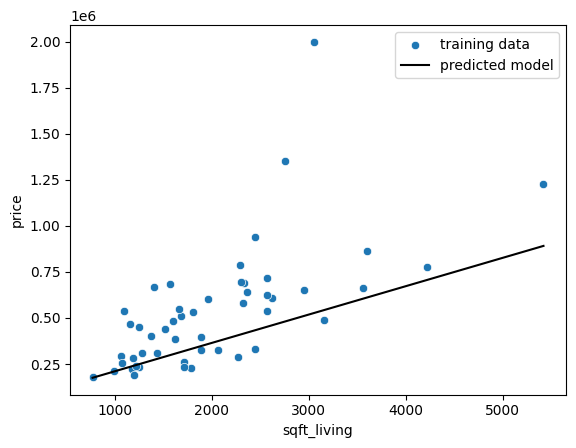

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
y_model = model.predict(scaler.fit_transform(x_model.reshape(-1,1)))
plt.plot(x_model,  y_model, color = 'k')
plt.legend(['training data', 'predicted model'])
plt.show()

### Polynomial regression :
1) Feature scaling and Transform poly features
2) model using a linear regression.
3) Predict using the Model

### Visualization for Poly regression


[211051.60498044] 532438.6
r2-score: 0.4173461244343011 
mean squared error: 62185849719.0 
mean absolute error: 161171.0


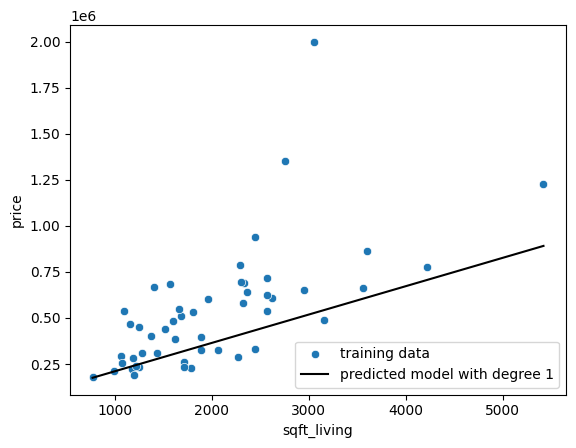

[240878.63506291 -21125.66947931] 553564.2694793064
r2-score: 0.4284636974265923 
mean squared error: 60999286388.0 
mean absolute error: 157625.0


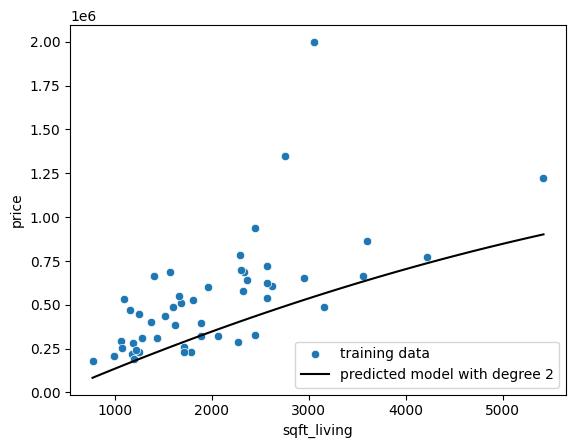

[244524.71676972 -11338.05354779  -3090.00180655] 548139.3828297787
r2-score: 0.4288664549104986 
mean squared error: 60956300634.0 
mean absolute error: 159361.0


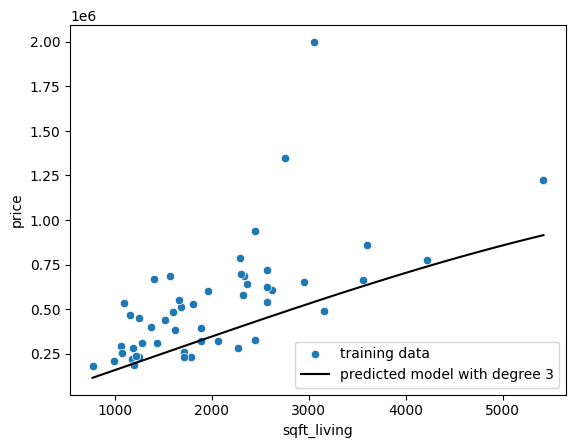

[340905.76930645  -2734.05869053 -78582.84911306  17860.93902562] 545170.3977938683
r2-score: 0.4488216977833014 
mean squared error: 58826504907.0 
mean absolute error: 159294.0


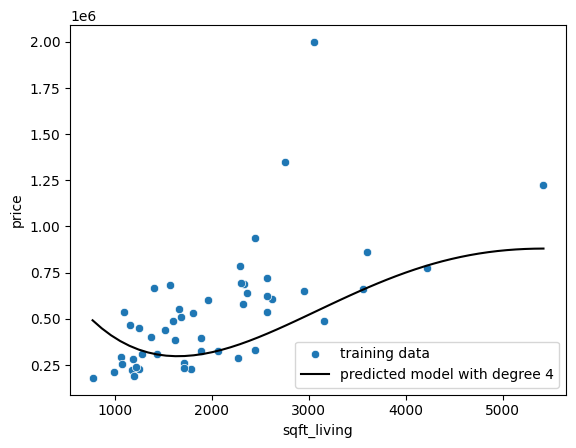

[303012.02984126 191876.41167818 -44143.55845641 -79088.84962854
  19894.7415532 ] 495512.6391591308
r2-score: 0.4779729643583166 
mean squared error: 55715230172.0 
mean absolute error: 161830.0


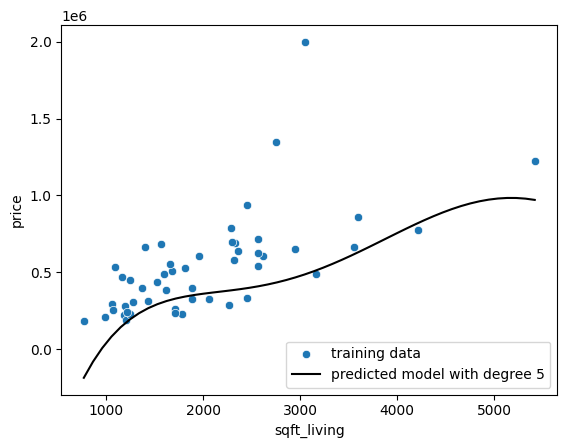

In [25]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

# Poly transformation
for i in range(1, 6):#Added by Ei Ei Tun
  order = i
  poly = PolynomialFeatures(degree=order, include_bias=False)
  poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))

  # Modeling.
  lr = LinearRegression()
  model = lr.fit(poly_features, y)
  print(model.coef_, model.intercept_)

  #Prediction

  Y_pred = model.predict(poly_features)
  rscore = model.score(poly_features, y)
  mse = mean_squared_error(y, Y_pred)
  mae = mean_absolute_error(y, Y_pred)

  print('r2-score:', rscore, '\nmean squared error:', np.round(mse), '\nmean absolute error:', np.round(mae))

  sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
  x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
  x_model_scaled = scaler.fit_transform(x_model.reshape(-1,1))

  x_model_poly  = poly.fit_transform(x_model_scaled)
  y_model = model.predict(x_model_poly)

  plt.plot(x_model,  y_model, color = 'k')
  plt.legend(['training data', 'predicted model with degree ' + str(order)])
  plt.show()


### Saving Best Model for Deployment

In [12]:
import joblib
best_order = 2
X = df1['sqft_living'].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

poly = PolynomialFeatures(degree=best_order, include_bias=False)
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))

lr = LinearRegression()
model = lr.fit(poly_features, y)

joblib.dump(model,'best_model.pkl')

Y_pred = model.predict(poly_features)
rscore = model.score(poly_features, y)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)
print('r2-score:', rscore, '\nmean squared error:', np.round(mse), '\nmean absolute error:', np.round(mae))


r2-score: 0.4284636974265923 
mean squared error: 60999286388.0 
mean absolute error: 157625.0
